# **Capstone Module 2 - SaaS Analisis**
# **JCDS 0406 001 - Abdul Hadi Setiawan**

# <strong>  1. Latar Belakang Bisnis

### Tentang Perusahaan
SaaS (Software as a Service)  adalah model layanan komputasi yang menyediakan perangkat lunak sebagai layanan bagi pengguna yang diakses melalui internet dengan cara berlangganan. SaaS yang secara khusus berfokus pada penjualan melalui platform Amazon beroperasi di industri besar e-commerce dan terus berkembang di era digital. Mereka memiliki kepentingan khusus dalam menganalisis data, menjalin kemitraan yang strategis dengan Amazon, dan bertujuan untuk meningkatkan efisiensi operasional di platform tersebut. Meskipun mereka menghadapi persaingan dalam industri e-commerce yang sangat kompetitif, perusahaan ini berusaha memberikan solusi perangkat lunak menggunakan teknologi dan analisis data sebagai alat utama, dengan tujuan membantu bisnis mencapai kesuksesan yang lebih besar di lingkungan Amazon.

### Permasalahan
 SaaS saat ini menghadapi kendala dalam memahami dan menganalisa kinerja produk mereka di beberapa negara dan bagaimana diskon mempengaruhi keuntungan secara keseluruhan. Selain itu, terdapat kesulitan dalam menilai kinerja produk dan strategi penjualan yang efektif. Penting untuk mengevaluasi bagaimana strategi penjualan yang diterapkan dapat meningkatkan volume penjualan dan profitabilitas. Untuk mengatasi masalah ini, dibutuhkan data scientist melakukan analisis data SaaS secara menyeluruh untuk membantu perusahaan memahami dinamika pasar dan mengoptimalkan strategi bisnis mereka.

### Stakeholder
1. Sales and Marketing Team:
- Mereka ingin menganalisis kinerja penjualan tertinggi dari 5 negara untuk memperluas tim dan jaringan mereka di wilayah tersebut.
- Mereka harus memilih 3 industri dengan keuntungan tertinggi untuk memprioritaskan industri mana yang harus mereka fokuskan.
- Mereka perlu mengetahui informasi dasar tentang 5 produk yang paling sukses  untuk memprioritaskan alokasi sumber daya mereka dalam R&D.
- Mereka ingin mengetahui korelasi antara profit dan diskon untuk mengukur efektivitas diskon dalam penjualan

# <strong>  2. Pemahaman dan Proses Pembersihan Data

### Loading Dataset

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import kruskal

In [323]:
df = pd.read_csv("SaaS-Sales.csv")
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [324]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

1. Row ID       : A unique identifier for each transaction.
2. Order ID     : A unique identifier for each order.
3. Order Date   : The date when the order was placed.
4. Date Key     : A numerical representation of the order date (YYYYMMDD).
5. Contact Name : The name of the person who placed the order.
6. Country      : The country where the order was placed.
7. City         : The city where the order was placed.
8. Region       : The region where the order was placed.
9. Subregion    : The subregion where the order was placed.
10. Customer    : The name of the company that placed the order.
11. Customer ID : A unique identifier for each customer.
12. Industry    : The industry the customer belongs to.
13. Segment     : The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product     : The product was ordered.
15. License     : The license key for the product.
16. Sales       : The total sales amount for the transaction.
17. Quantity    : The total number of items in the transaction.
18. Discount    : The discount applied to the transaction.
19. Profit      : The profit from the transaction.

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### Manipulasi Data

In [326]:
# Mengkonversi kolum 'Order Date' dan 'Date Key' ke Format datetime (YYYYMMDD)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Date Key'] = pd.to_datetime(df['Date Key'], format='%Y%m%d')

# Mengganti Tipe Data
df['Row ID'] = df['Row ID'].astype('int16')
df['Customer ID'] = df['Customer ID'].astype('int16')

# Menambah Kolum Tahun
df['Year'] = df['Order Date'].dt.year

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int16         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   datetime64[ns]
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int16         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [327]:
# Cek Unique Value dalam Kolom Country
np.sort(df['Country'].unique())

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

Tidak terdapat unique value dalam kolom Country

In [328]:
# Cek Unique Value dalam Kolom Industry
np.sort(df['Industry'].unique())

array(['Communications', 'Consumer Products', 'Energy', 'Finance',
       'Healthcare', 'Manufacturing', 'Misc', 'Retail', 'Tech',
       'Transportation'], dtype=object)

Tidak terdapat unique value dalam kolom Idustry

In [329]:
# Cek Unique Value dalam Kolom Segment
np.sort(df['Segment'].unique())

array(['Enterprise', 'SMB', 'Strategic'], dtype=object)

Tidak terdapat unique value dalam kolom Segment

In [330]:
# Cek Unique Value dalam Kolom Product
np.sort(df['Product'].unique())

array(['Alchemy', 'Big Ol Database', 'ChatBot Plugin', 'ContactMatcher',
       'Data Smasher', 'FinanceHub', 'Marketing Suite',
       'Marketing Suite - Gold', 'OneView', 'SaaS Connector Pack',
       'SaaS Connector Pack - Gold', 'Site Analytics', 'Storage',
       'Support'], dtype=object)

Tidak terdapat unique value dalam kolom Pruduct

### Cek Data Duplicate dan Missing Value 

In [331]:
# Cek Data Duplicate
duplicate_rows = df[df.duplicated()]
print("Jumlah data duplikat:", duplicate_rows.shape[0])
print("Data duplikat:")
print(duplicate_rows)

Jumlah data duplikat: 0
Data duplikat:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit, Year]
Index: []


Tidak ada data duplikat, oleh karena itu tidak diperlukan untuk menghapus data duplikat

Missing Value for Each Column:
 Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
Year            0
dtype: int64


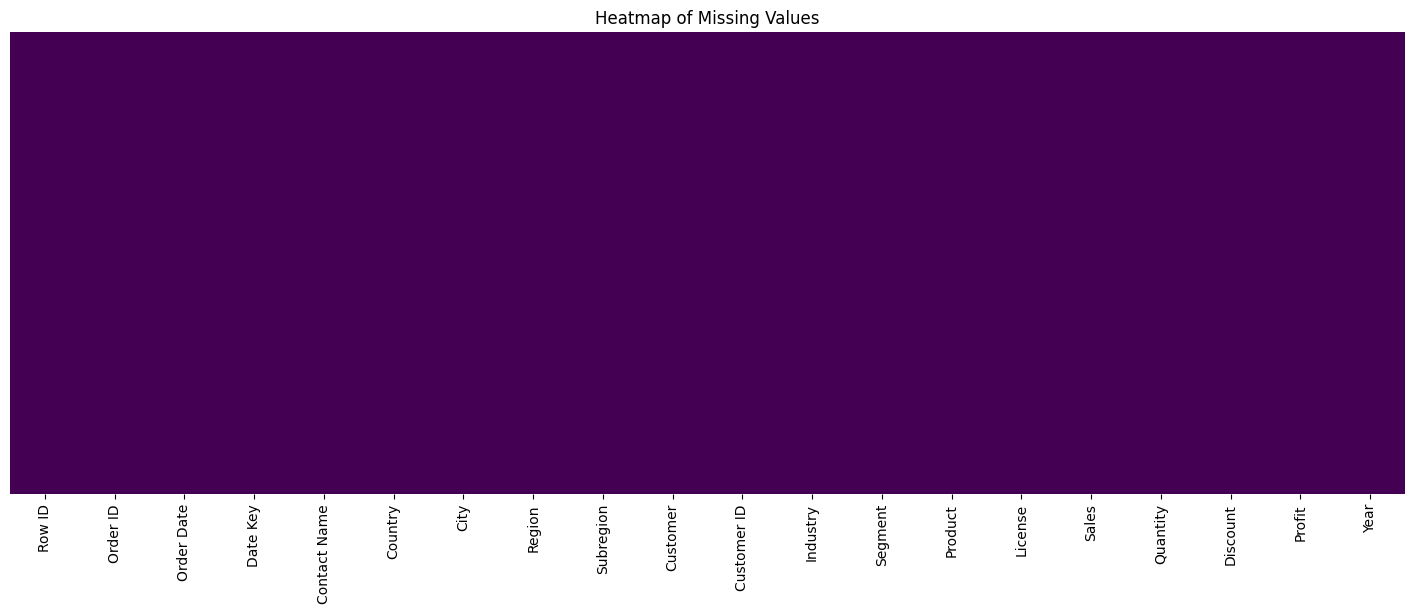

In [332]:
# Menghitung Missing Value pada Setiap Kolom
missing_values = df.isnull().sum()

print("Missing Value for Each Column:\n", missing_values)

# Menampilkan Visualisasi dengan Heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

Tidak ada missing value, oleh karena itu tidak diperlukan tindakan untuk mengisi atau menghapus baris yang memiliki missing value

In [333]:
pd.DataFrame({
    'feature'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value(%)'     : df.isna().mean().values * 100,
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum(),
    'sample_unique'     : [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),n_unique,duplicate,sample_unique
0,Row ID,int16,0.0,9994,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,object,0.0,5009,0,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,datetime64[ns],0.0,1237,0,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
3,Date Key,datetime64[ns],0.0,1237,0,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
4,Contact Name,object,0.0,793,0,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,object,0.0,48,0,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,object,0.0,262,0,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,object,0.0,3,0,"[EMEA, AMER, APJ]"
8,Subregion,object,0.0,12,0,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,object,0.0,99,0,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Setelah melakukan pengecekan data, secara umum kita bisa melihat bahwa:
* dataset SaaS memiliki 19 kolom dan 9994 baris
* Dari setiap kolom menunjukan bahwa tidak terdapat missing value dan data duplikat.

Dapat disimpulkan bahwa data ini adalah data yang bersih

In [352]:
# Menghitung IQR pada Setiap Kolum Numerik
# Kolom numerik
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

outliers_info = {}

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_info[col] = {
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info_df = pd.DataFrame(outliers_info).transpose()
print(outliers_info_df)

                IQR  Lower Bound  Upper Bound  Outliers Count
Sales     192.66000  -271.710000   498.930000             0.0
Quantity    3.00000    -2.500000     9.500000             0.0
Discount    0.20000    -0.300000     0.500000             0.0
Profit     27.63525   -39.724125    70.816875             0.0


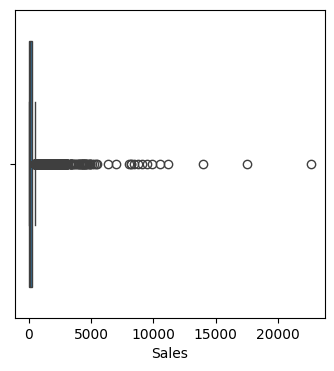

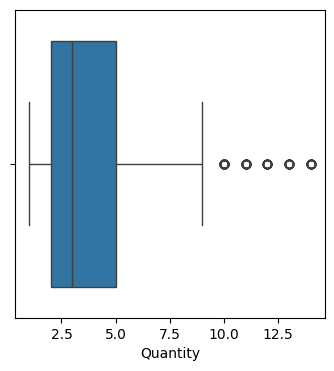

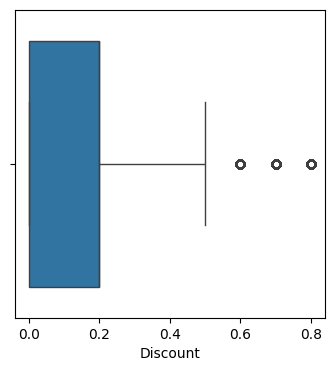

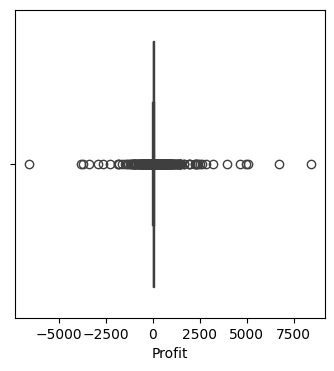

In [346]:
#Menampilkan Boxplot pada Setiap Kolum.
plt.figure(figsize=(4,4))
sns.boxplot(x=df['Sales'])
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(x=df['Quantity'])
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(x=df['Discount'])
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(x=df['Profit'])
plt.show()

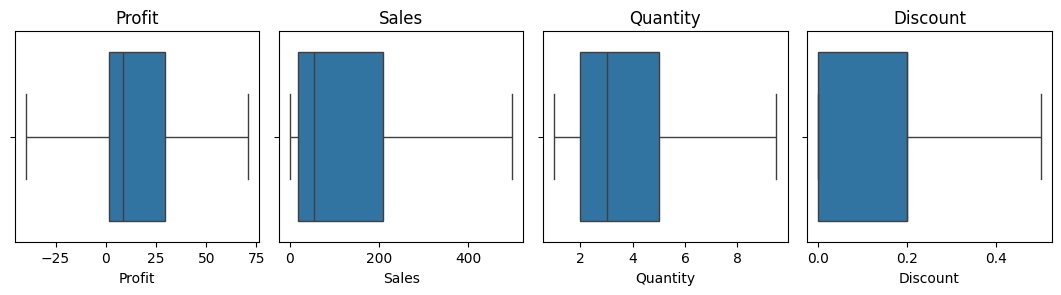

In [348]:
numerical_cols = ['Profit', 'Sales', 'Quantity', 'Discount']

# Define a function to insert outliers using upper and lower bounds
def insert_outliers_with_bounds(df, column_name, threshold=1.5):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    df_copy = df.copy()  # Create a copy of the DataFrame
    df_copy.loc[df_copy[column_name] < lower_bound, column_name] = lower_bound
    df_copy.loc[df_copy[column_name] > upper_bound, column_name] = upper_bound

    return df_copy


# Apply the function to insert outliers for the specified columns
for column in numerical_cols:
    df = insert_outliers_with_bounds(df, column)

# Create boxplots after inserting outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_cols):
    plt.subplot(3, 6, i + 1)  # Create a grid of 3 rows and 6 columns
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

# <strong> 3. Analisa Data, Menamplikan Visualisasi, Kesimpulan dan Rekomendasi

    1. 5 Negara dengan penjualan tertinggi: perusahan ingin mengetahui 5 negara dengan penjualan tertinggi.

Country
United States     457687.6315
United Kingdom    313169.8810
Japan             170188.0458
Canada            138641.2700
France            116511.9140
Name: Sales, dtype: float64
Country
United States     19.923710
United Kingdom    13.632673
Japan              7.408497
Canada             6.035226
France             5.071908
Name: Sales, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7472\3648295158.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_countries_sales.index, y=top_5_countries_sales.values, palette='mako')


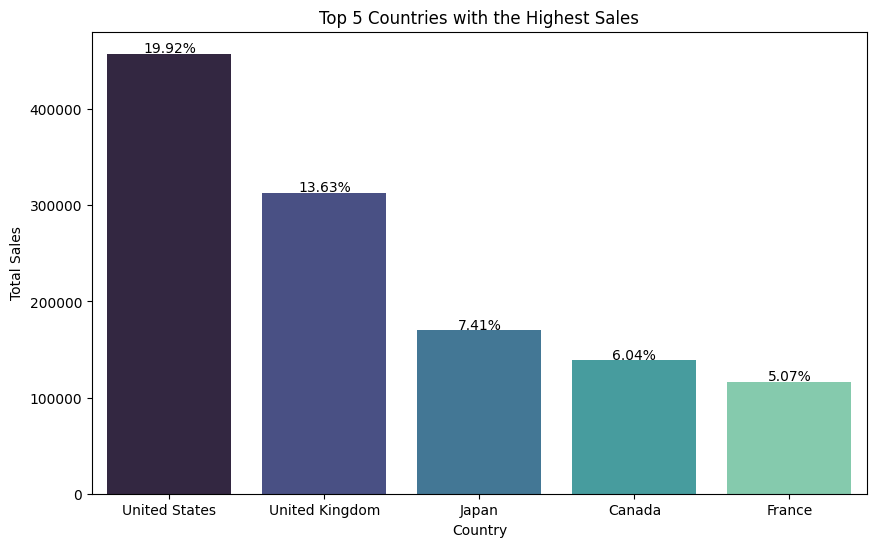

In [334]:
# Menghitung Total Sales per negara
total_sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

#  5 Country with total profit tertinggi
top_5_countries_sales = total_sales_by_country.head(5)

# Hitung persentase dari total profit yang diwakili oleh 5 negara teratas
percentage_top_5_countries = (top_5_countries_sales / total_sales_by_country.sum()) * 100

# Menampilkan hasil
print(top_5_countries_sales)
print(percentage_top_5_countries)

# Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_countries_sales.index, y=top_5_countries_sales.values, palette='mako')
plt.title('Top 5 Countries with the Highest Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')

# Tambahkan label persentase pada bar chart
for p, percentage in zip(ax.patches, percentage_top_5_countries):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1000, '{:1.2f}%'.format(percentage), ha="center") 

plt.show()


     2. 3 Industri dengan total profit tertinggi: Perusahan ingin mengetahui 3 industri dengan total profit tertinggi.

In [335]:
# Menghitung Total Profit setiap Industry
total_profit_all_industry = df.groupby('Industry')[['Profit']].sum().apply(lambda x: round(x,2))
total_profit_all_industry

,Profit
Industry,
Communications,13976.34
Consumer Products,37018.01
Energy,45282.31
Finance,50348.97
Healthcare,31969.09
Manufacturing,38413.11
Misc,7163.63
Retail,30207.82
Tech,24615.04


In [336]:
top_3_profit_industry = total_profit_all_industry.sort_values(by='Profit', ascending=False).head(3)
top_3_profit_industry

,Profit
Industry,
Finance,50348.97
Energy,45282.31
Manufacturing,38413.11


(0.0, 100.0, 0.0, 100.0)

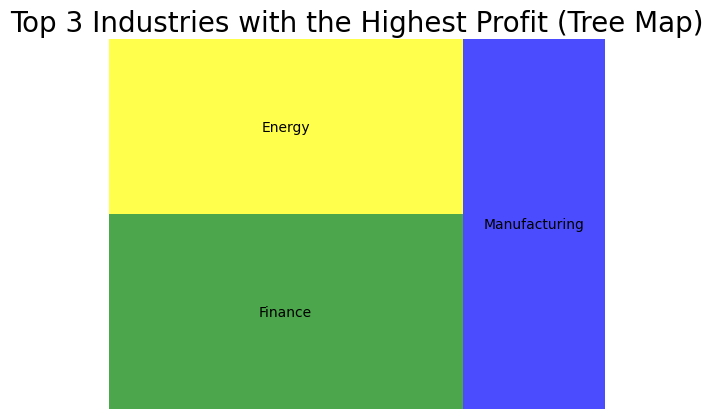

In [353]:
# Data top 3 industri dengan keuntungan tertinggi
top_3_profit_industry = total_profit_all_industry.sort_values(by='Profit', ascending=False).head(3)

# Ekstrak data dari DataFrame
sizes = top_3_profit_industry['Profit']
labels = top_3_profit_industry.index  # Menggunakan indeks industri sebagai label

# Membuat tree map
squarify.plot(sizes=sizes, label=labels, color=['green', 'yellow', 'blue'], alpha=0.7)

# Menambahkan judul plot
plt.title('Top 3 Industries with the Highest Profit (Tree Map)', fontsize=20)

# Menghilangkan sumbu (axis)
plt.axis('off')

     3. 5 Produk dengan margin profit tertinggi: Perusahaan ingin mengetahui 5 produk dengan margin keuntungan tertinggi

In [338]:
total_profit_from_products = df.groupby('Product')[['Profit', 'Sales']].sum()
total_profit_from_products

,Profit,Sales
Product,,
Alchemy,55617.8249,149528.0300
Big Ol Database,3384.7569,189238.6310
ChatBot Plugin,6527.7870,27118.7920
ContactMatcher,12496.2822,410378.2650
Data Smasher,41936.6357,167380.3180
FinanceHub,32136.4203,340935.4150
Marketing Suite,-3472.5560,114879.9963
Marketing Suite - Gold,21278.8264,223843.6080
OneView,18138.0054,107532.1610


In [339]:
# Menghitung total profit dan sales untuk setiap produk
total_profit_from_products = df.groupby('Product')[['Profit', 'Sales']].sum()

# Menambahkan kolom baru untuk perbandingan margin dalam persen
total_profit_from_products['Margin (%)'] = round (total_profit_from_products['Profit'] / total_profit_from_products['Sales']*100).apply(lambda x: int(x))

# Menampilkan hasil
total_profit_from_products.head()

,Profit,Sales,Margin (%)
Product,,,
Alchemy,55617.8249,149528.030,37
Big Ol Database,3384.7569,189238.631,2
ChatBot Plugin,6527.7870,27118.792,24
ContactMatcher,12496.2822,410378.265,3
Data Smasher,41936.6357,167380.318,25


In [340]:
the_highest_profit_from_products = total_profit_from_products.sort_values(by='Margin (%)', ascending=False).head().reset_index()
the_highest_profit_from_products.head()

,Product,Profit,Sales,Margin (%)
0,SaaS Connector Pack - Gold,6964.1767,16476.402,42
1,Alchemy,55617.8249,149528.030,37
2,Storage,949.5182,3024.280,31
3,Support,32864.4698,125152.744,26
4,Data Smasher,41936.6357,167380.318,25


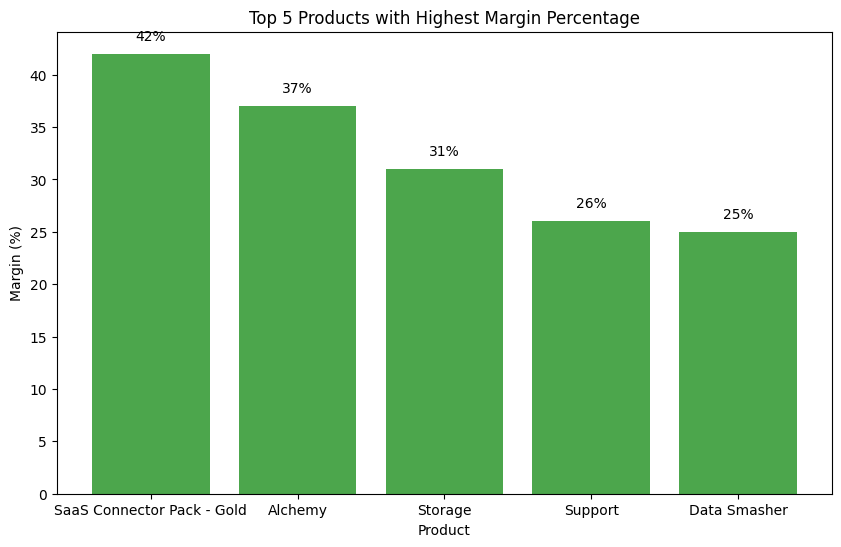

In [341]:
# Plot bar chart untuk top 5 produk dengan margin tertinggi
plt.figure(figsize=(10, 6))
plt.bar(the_highest_profit_from_products['Product'], the_highest_profit_from_products['Margin (%)'], color='green', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Product')
plt.ylabel('Margin (%)')
plt.title('Top 5 Products with Highest Margin Percentage')

# Menambahkan nilai persentase margin pada bar
for i, val in enumerate(the_highest_profit_from_products['Margin (%)']):
    plt.text(i, val + 1, f'{val}%', ha='center', va='bottom', color='black')

plt.show()


     4. Menghitung korelasi antara Profit, Sales, and Discount: Perusahan ingin mengetahui korelasi antara profit dan diskon untuk mengukur efektivitas diskon dalam penjualan

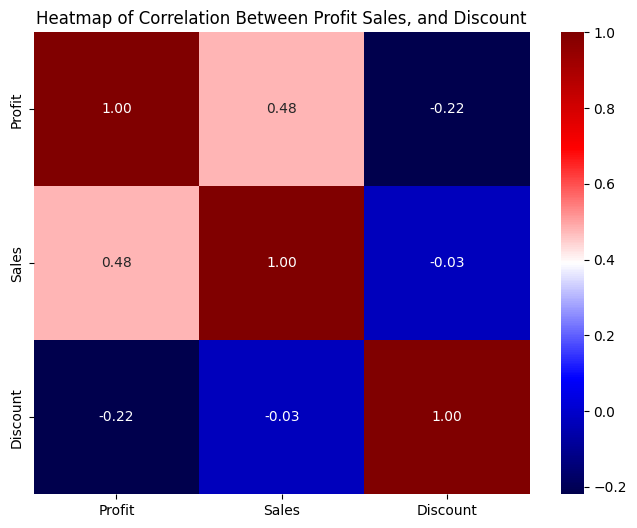

,Profit,Sales,Discount
Profit,1.000000,0.479064,-0.219487
Sales,0.479064,1.000000,-0.028190
Discount,-0.219487,-0.028190,1.000000


In [342]:
# Hitung matriks korelasi antara Profit, Sales, dan Discount
correlation_matrix = df[['Profit', 'Sales', 'Discount']].corr()

# Visualisasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f")
plt.title('Heatmap of Correlation Between Profit Sales, and Discount')
plt.show()

correlation_matrix

Profit vs Sales: 0,45 (Korelasi positif sedang)

Profit vs Discount: -0,52 (Korelasi negatif kuat)

Sales vs Discount: -0,01 (Tidak ada korelasi signifikan)

     Penjelasan:

Profit dan sales: Ada hubungan positif antara profit dan sales, artinya penjualan yang lebih tinggi cenderung dikaitkan dengan laba yang lebih tinggi.

Profit dan Discount: Terdapat hubungan negatif yang kuat antara profit dan discount, yang menunjukkan bahwa diskon cenderung mengurangi keuntungan.

Sales dan Discount: Tidak ada hubungan yang signifikan antara penjualan dan diskon, menunjukkan bahwa peningkatan diskon tidak berhubungan langsung dengan peningkatan atau penurunan penjualan.

In [344]:
import scipy.stats as stats

# Menghitung korelasi Spearman antara 'Profit' dan 'Discount'
spearman_corr_coefficient_profit_discount, spearman_p_value_profit_discount = stats.spearmanr(df['Profit'], df['Discount'])

# Menampilkan hasil korelasi Spearman
print("Koefisien Korelasi Spearman:", spearman_corr_coefficient_profit_discount)
print("Nilai p-value:", spearman_p_value_profit_discount)

Koefisien Korelasi Spearman: -0.5433501822306213
Nilai p-value: 0.0


nilai p : 0.0 (sangat kecil, mendekati nol)

     Penjelasan:

Dampak Diskon terhadap Profit: Diskon tampaknya berdampak negatif terhadap profit, yang mungkin disebabkan oleh diskon yang mengurangi margin keuntungan per unit produk yang dijual.

Pertimbangan Kebijakan Diskon: Perusahaan harus meninjau kembali kebijakan diskonnya untuk memastikan bahwa diskon tidak mengurangi keuntungan secara berlebihan.

Uji Korelasi Spearman: Uji korelasi Spearman adalah metode yang lebih tepat untuk digunakan dalam konteks ini. Hasil uji Spearman memberikan bukti kuat adanya hubungan negatif antara laba dan diskon.

# Kesimpulan dan Rekomendasi

  Kesimpulan
- Amerika Serikat, Inggris, Jepang, Kanada, dan Prancis menjadi negara dengan penjualan tertinggi.
- Industri Finance, Energy, and Manufacturing menghasilkan keuntungan tertinggi.
- Produk dan Margin Profit: Beberapa produk memiliki margin keuntungan yang sangat tinggi, seperti 'SaaS Connector Pack-Gold', Alchemy, Storage, Support, and Data Smasher.
- Terdapat korelasi negatif antara penjualan dan diskon, penting untuk mengevaluasi strategi diskon Anda dengan cermat


Rekommendasi:
- Disarankan perusahan Untuk memperluas tim dan jaringan Anda di wilayah ini, perushaan harus mempertimbangkan untuk membentuk tim penjualan dan memanfaatkan potensi penjualan yang kuat di masing-masing negara tersebut. 
- Perusahaan diharapkan mertimbangkan untuk menyesuaikan penawaran produk dan strategi pemasaran Anda untuk secara khusus menargetkan pada industri ini.
- Perusahaan disarankan untuk mengalokasikan lebih banyak sumber daya dan fokus untuk lebih meningkatkan dan mengembankan produk-produk seperti eperti 'SaaS Connector Pack-Gold', Alchemy, Storage, Support, and Data Smasher.
- perusahaan harus mertimbangkan untuk melakukan pengujian lebih lanjut untuk mengukur dampak diskon terhadap profit penjualan.